<a href="https://colab.research.google.com/github/sakp7/HandWritten-Digit-MNIST-/blob/main/Handwritten_Classification(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DIGIT CLASSIFICATION
# A Project on MNIST Data set to identify digits 

In [ ]:
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.mnist.load_data() 


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
label=['0','1','2','3','4','5','6','7','8','9']

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

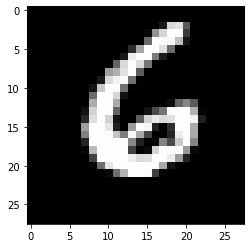

Output:6


In [ ]:
#visualizing the traininig data
import matplotlib.pyplot as plt 
i = 90
plt.imshow(x_train[i],cmap='gray')
plt.show()
print(f'Output:{label[y_train[i]]}')

In [ ]:
y_train #output categories 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#Normalization 
x_train = x_train/255 
x_test = x_test/255

In [ ]:
x_train[0].min()

0.0

In [ ]:
x_train[0].max()

1.0

In [ ]:
#creating Neural Network
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape)) #input layer #flattens out the input neurons (28*28=784 neurons are added)
model.add(tf.keras.layers.Dense(1500,activation = 'relu')) #Hidden layer 
model.add(tf.keras.layers.Dense(10,activation = 'softmax')) #Output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1500)              1177500   
                                                                 
 dense_1 (Dense)             (None, 10)                15010     
                                                                 
Total params: 1,192,510
Trainable params: 1,192,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 7s 2ms/step - loss: 0.1802 - accuracy: 0.9453
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0741 - accuracy: 0.9767
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0482 - accuracy: 0.9844
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0337 - accuracy: 0.9895
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0261 - accuracy: 0.9915
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0209 - accuracy: 0.9929
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0177 - accuracy: 0.9943
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0188 - accuracy: 0.9938
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0122 - accuracy: 0.9961
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

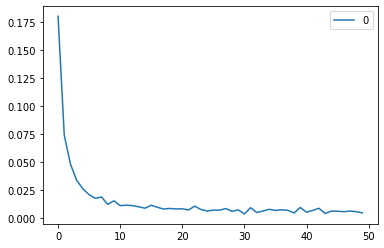

In [ ]:
import pandas as pd
loss = pd.DataFrame(model.history.history['loss']).plot()

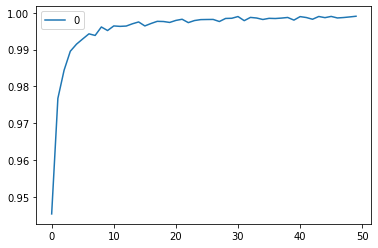

In [ ]:
acc = pd.DataFrame(model.history.history['accuracy']).plot() #training accuracy plot

In [ ]:
#predicting Output
import numpy as np 
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)  #returns the index of the maximum number from the numpy array
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9814

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
model.save('model_digit.hdf5') 
# storing the neural network model inside a file 


In [ ]:
!pip install streamlit==0.83.0 --quiet

!pip install streamlit-drawable-canvas --quiet

ERROR: Operation cancelled by user


In [ ]:
%%writefile new.py
import streamlit as st
import numpy as np
from tensorflow import keras 
from streamlit_drawable_canvas import st_canvas 
import cv2
model = keras.models.load_model('model_digit.hdf5',compile=False) 

col1,col2 = st.beta_columns(2)

with col1: 
  st.write('Original Image')
  canvas_result = st_canvas(fill_color = '#000000', stroke_color = '#FFFFFF',stroke_width = 20, background_color = '#000000',width = 300,height = 300, drawing_mode = "freedraw")

with col2: 


  if canvas_result.image_data is not None: 
    img = cv2.resize(canvas_result.image_data.astype('uint8'),(28,28)) 
    rescaled = cv2.resize(img,(300,300))
    st.write('Rescaled Image')
    st.image(rescaled)

if st.button('Predict'): 
  test_x = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  test_x = np.expand_dims(test_x,axis=0)  
  val = model.predict(test_x)
  st.title(f'Result:{np.argmax(val[0])}')  
        
  st.bar_chart(val[0])

Overwriting new.py


In [ ]:
!streamlit run new.py & npx localtunnel --port 8501

2022-08-24 06:34:30.618 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.961s
your url is: https://six-nails-dress-34-123-216-117.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.123.216.117:8501

2022-08-24 06:34:38.850776: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-08-24 06:43:50.807 MediaFileManager: Missing file 99e0b5ebb89bf4992b601fba9338c1624da5a4da46f711b686ea89f1.png
2022-08-24 06:43:51.886 MediaFileManager: Missing file db67212368a1fb81be83859b54d98e2b27702ae1b117c89d178ee10d.png
2022-08-24 06:43:53.380 MediaFileManager: Missing file ea9691c93185741ebe0ac588fe951b593e329afb0a4dbaddca62e74a.png
2022-08-24 06:43:54.578 MediaFileManager: Missing file 3e4509c5dc0d10dba76ebbe02a69432998b1b4edab82fd9db78298bc.png
2022-08-24 